# Vaccination rates in the world as predicted by 1977 GDP per capita
This notebook makes use of two data sets:
* An excerpt of [Gapminder]() data, extracted from the [R Gapminder package](https://www.rdocumentation.org/packages/gapminder/versions/0.3.0)
* A dataset about COVID-19 world vaccination from [Kaggle](https://www.kaggle.com/gpreda/covid-world-vaccination-progress), in turn based on [Our World in Data's github repository](https://github.com/owid/covid-19-data)

The notebook is inspired by, and bits of code are copied from, [this jupyter notebook](https://github.com/verku/pydata-book/blob/pyladies_sthlm_study_group/ch09_additional_plots.ipynb) by another study group participant. It was also inspired by the Citations Needed podcast episode ["Episode 129 - Vaccine Apartheid: US Media's Uncritical Adoption of Racist 'Intellectual Property' Dogma"](https://citationsneeded.libsyn.com/episode-129-vaccine-apartheid-us-medias-uncritical-adoption-of-racist-intellectual-property-dogma).

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
gap = pd.read_csv('sample_data_files/gapminder.csv')
vacc = pd.read_csv('sample_data_files/country_vaccinations.csv')

In [3]:
# only use gapminder data from 1977
gap = gap[gap.year == 1977]

In [4]:
# convert to datetime format column
vacc.date = pd.to_datetime(vacc.date)

In [5]:
# find indices of countries' most recent vaccination rate reports
max_date_indices = vacc.groupby('country')['date'].idxmax()

In [6]:
# keep only rows with each country's most recent data
vacc = vacc.iloc[max_date_indices.values]

In [7]:
# keep only data for countries in both data frames
gap = gap[gap.country.isin(vacc.country)]
vacc = vacc[vacc.country.isin(gap.country)]

In [8]:
# join the data frames
gv_df = gap.merge(vacc, on='country')

In [9]:
# get the most recent date of report
foo = gv_df.date.max()

In [10]:
foo.date()

datetime.date(2021, 2, 22)

Text(0, 0.5, 'Proportion of population vaccinated by 2021-02-22 (%)')

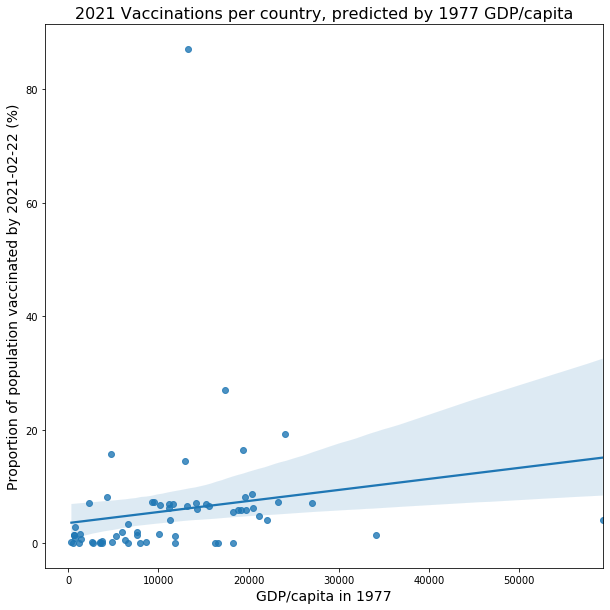

In [11]:
# explicitly create the figure/axis, to enable more direct control over them
fig, ax = plt.subplots(figsize=(10, 10))
# create a regression plot (ie univariate linear regression)
sns.regplot(x="gdpPercap", y="total_vaccinations_per_hundred", data=gv_df)
# add some labels, increasing text sizes for clarity
ax.set_title("2021 Vaccinations per country, predicted by 1977 GDP/capita", fontsize=16)
ax.set_xlabel("GDP/capita in 1977", fontsize=14)
ax.set_ylabel(f"Proportion of population vaccinated by {gv_df.date.max().date()} (%)", fontsize=14)

In [12]:
# remove extreme outliers (Israel with regard to rate of vaccination, 
# Kuwait with regard to 1977 GDP/capita)
out_countries = ['Israel', 'Kuwait']
gv_df_noout = gv_df[~gv_df.country.isin(out_countries)]

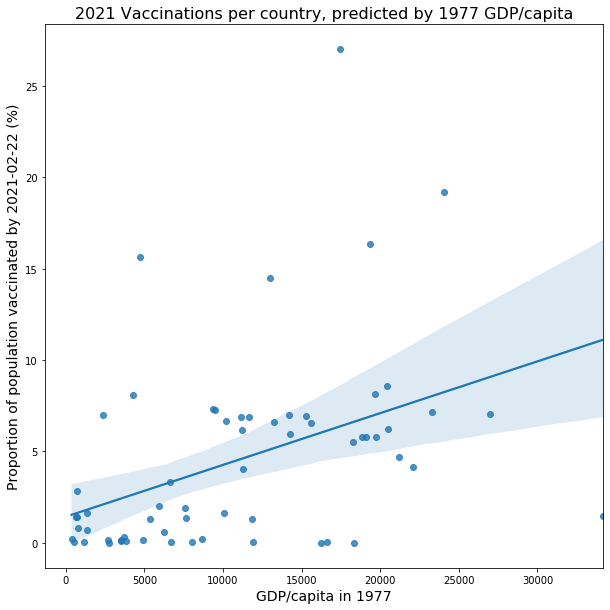

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(x="gdpPercap", y="total_vaccinations_per_hundred", data=gv_df_noout)
ax.set_title("2021 Vaccinations per country, predicted by 1977 GDP/capita", fontsize=16)
ax.set_xlabel("GDP/capita in 1977", fontsize=14)
ax.set_ylabel(f"Proportion of population vaccinated by {gv_df.date.max().date()} (%)", fontsize=14)
# save the plot
# plt.savefig('gdp1977_vacc_plot.png')